# Setup

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load data
We take 70000+ Turkish News data from https://www.kaggle.com/datasets/suleymancan/turkishnews70000

In [9]:
dataset = pd.read_csv("./turkish_news_70000.csv", index_col="id")
dataset.head()

,main_image,published,site,text,title,url
id,,,,,,
72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72109 entries, 72337 to 72336
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   main_image  72109 non-null  object
 1   published   72109 non-null  object
 2   site        72109 non-null  object
 3   text        72109 non-null  object
 4   title       72109 non-null  object
 5   url         72109 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [11]:
# we only use 10000 rows of the dataset
dataset = dataset[:10000]

In [12]:
# we only need 'text' column
news_df = dataset[["text"]]
news_df.head()

,text
id,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04..."


# Data cleaning

In [13]:
import re
import string
import nltk
nltk.download('stopwords')

# stopwords
from nltk.corpus import stopwords
stop_words_tr = stopwords.words('turkish') 
stop_words_tr.extend(["bir", "kadar", "sonra"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Polat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# for data cleaning
def clean_data(text: str) -> str:
    text = text.replace("\\n"," ")
    text = re.sub("’(\w+)", "", text) 
    text = re.sub("'(\w+)", "", text) 
    text = re.sub("[\W || \d]", " ", text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words_tr]
    text = " ".join(text)
    
    return text

<>:4: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \W
<>:4: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \W
C:\Users\Polat\AppData\Local\Temp\ipykernel_5028\3696473417.py:4: DeprecationWarning: invalid escape sequence \w
  text = re.sub("’(\w+)", "", text)
C:\Users\Polat\AppData\Local\Temp\ipykernel_5028\3696473417.py:5: DeprecationWarning: invalid escape sequence \w
  text = re.sub("'(\w+)", "", text)
C:\Users\Polat\AppData\Local\Temp\ipykernel_5028\3696473417.py:6: DeprecationWarning: invalid escape sequence \W
  text = re.sub("[\W || \d]", " ", text)


In [15]:
news_df["cleaned_text"] = news_df["text"].apply(clean_data)

C:\Users\Polat\AppData\Local\Temp\ipykernel_5028\3696473417.py:6: FutureWarning: Possible set union at position 4
  text = re.sub("[\W || \d]", " ", text)
C:\Users\Polat\AppData\Local\Temp\ipykernel_5028\3238637071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df["cleaned_text"] = news_df["text"].apply(clean_data)


In [16]:
news_df.head()

,text,cleaned_text
id,,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte görec...
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya millet ittifakı ...
72339,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı i̇yi̇ partililerin istifa gerekçesi akp s...
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...


In [17]:
news_df.iloc[3].text

'"Ağrı’daki İYİ Partililerin istifa gerekçesi: AKP’li Savcı Sayan’ın iş bilen kişiliği! 04/03/2019 12:53\\nİYİ Parti Ağrı Gençlik Kolları üyeleri istifa edip AKP adayı Savcı Sayan’a destek vereceklerini ilan etti. Fotoğraf: Arşiv\\nEski CHP genel başkanı Deniz Baykal’ın yönetim ekibinde yer alan Savcı Sayan, Kemal Kılıçdardoğlu’nun liderliğe gelmesiyle partiden uzaklaşarak AKP’ye geçmişti. 2015’teki genel seçimlerde İzmir’de AKP’den ikinci bölge yedinci sıradan aday gösterilen Sayan meclise girmeyi başaramamıştı. Sayan, 24 Haziran 2018’deki genel seçimler için AKP’den adaylık başvurusu yapmış ancak parti yönetimi tarafından kabul edilmemişti. Reklam\\nSayan son olarak 31 Mart’taki yerel seçimlerde AKP’nin Ağrı belediye başkan adayı.\\nİYİ Parti Ağrı Gençlik Kolları Başkanı Emrah Aslan, beraberindeki üyelerle Abide Meydanı’nda yaptığı basın açıklamasında parti genel merkezinin sürdürdüğü yanlış politikalar gerekçesiyle topluca istifa kararı alındığını belirtti.\\nBir yıl önce İYİ Parti’

In [18]:
news_df.iloc[3].cleaned_text

'ağrı i̇yi̇ partililerin istifa gerekçesi akp savcı sayan iş bilen kişiliği i̇yi̇ parti ağrı gençlik kolları üyeleri istifa edip akp adayı savcı sayan destek vereceklerini ilan etti fotoğraf arşiv eski chp genel başkanı deniz baykal yönetim ekibinde yer alan savcı sayan kemal kılıçdardoğlu liderliğe gelmesiyle partiden uzaklaşarak akp geçmişti genel seçimlerde i̇zmir akp ikinci bölge yedinci sıradan aday gösterilen sayan meclise girmeyi başaramamıştı sayan haziran genel seçimler akp adaylık başvurusu yapmış ancak parti yönetimi tarafından kabul edilmemişti reklam sayan son olarak mart yerel seçimlerde akp ağrı belediye başkan adayı i̇yi̇ parti ağrı gençlik kolları başkanı emrah aslan beraberindeki üyelerle abide meydanı yaptığı basın açıklamasında parti genel merkezinin sürdürdüğü yanlış politikalar gerekçesiyle topluca istifa kararı alındığını belirtti yıl önce i̇yi̇ parti katıldıklarını belirten aslan şöyle konuştu istifanın sorumlusu ana kademe il başkanı belediye başkan adayımızdır

In [19]:
# add tokenized form of text as column
news_df["tokenized_text"] = news_df["cleaned_text"].apply(lambda x: x.split())

C:\Users\Polat\AppData\Local\Temp\ipykernel_5028\1534226955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df["tokenized_text"] = news_df["cleaned_text"].apply(lambda x: x.split())


In [20]:
news_df.head(10)

,text,cleaned_text,tokenized_text
id,,,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte görec...,"[yatırım, bankası, dolar, tl, üçüncü, çeyrekte..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya millet ittifakı ...,"[pi̇ar, araştırma, adana, antalya, millet, itt..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...,"[renaissance, capital, merkez, bankası, hafta,..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı i̇yi̇ partililerin istifa gerekçesi akp s...,"[ağrı, i̇yi̇, partililerin, istifa, gerekçesi,..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...,"[otomobil, pazarı, iki, ayda, yarı, yarıya, er..."
72342,"""Şubat ayında ihracat yüzde 3.7 arttı, ithalat...",şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."
72343,"""YSK Başkanı Güven'den 'seçim güvenliği' açıkl...",ysk başkanı güven güvenliği açıklaması şubat c...,"[ysk, başkanı, güven, güvenliği, açıklaması, ş..."
72344,"""Hapisten çıkmasın diye kızları intihara kalkı...",hapisten çıkmasın kızları intihara kalkışmıştı...,"[hapisten, çıkmasın, kızları, intihara, kalkış..."
72345,"""Yavaş’tan Özhaseki’ye: Tecrübeyse, Gökçek dah...",yavaş özhaseki tecrübeyse gökçek tecrübeliydi ...,"[yavaş, özhaseki, tecrübeyse, gökçek, tecrübel..."


# Create LDA model

Resource: https://radimrehurek.com/gensim/models/ldamodel.html

In [21]:
!pip install -q pyLDAvis

In [23]:
import gensim
import gensim.corpora as corpora

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis # for virtualization of LDA model

In [25]:
# list of word - dictionary 
tokenized_news = news_df["tokenized_text"]
dictionary = corpora.Dictionary(tokenized_news)

# filter list of word
dictionary.filter_extremes(no_below=3, no_above=0.7)

In [26]:
# Create a corpus from a list of texts
corpus = [dictionary.doc2bow(doc) for doc in tokenized_news]

In [27]:
# train LDA(Latent Dirichlet Allocation) model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=15,
                                            passes=10)

# Results

In [28]:
topics = lda_model.print_topics(num_words=7) 

for topic in topics:
    print(topic)

(0, '0.007*"yatırım" + 0.007*"a" + 0.007*"yer" + 0.006*"bist" + 0.006*"yorum" + 0.005*"alan" + 0.005*"uygun"')
(1, '0.008*"ilk" + 0.006*"son" + 0.006*"fenerbahçe" + 0.006*"yeni" + 0.005*"türkiye" + 0.005*"türk" + 0.005*"teknik"')
(2, '0.017*"i̇stanbul" + 0.008*"haberler" + 0.008*"olarak" + 0.008*"tarafından" + 0.007*"ilgili" + 0.007*"yerel" + 0.006*"üzerinde"')
(3, '0.011*"türkiye" + 0.010*"var" + 0.007*"erdoğan" + 0.007*"dedi" + 0.005*"olduğunu" + 0.005*"konuştu" + 0.005*"i̇stanbul"')
(4, '0.022*"çin" + 0.022*"ab" + 0.021*"abd" + 0.019*"i̇ngiltere" + 0.013*"avrupa" + 0.012*"petrol" + 0.010*"ticaret"')
(5, '0.033*"yakala" + 0.029*"co" + 0.017*"hürriyet" + 0.012*"gün" + 0.008*"mayıs" + 0.008*"gazetesi" + 0.008*"lüks"')
(6, '0.010*"olay" + 0.006*"polis" + 0.006*"ardından" + 0.005*"gelen" + 0.005*"kişi" + 0.005*"geldi" + 0.005*"üzerine"')
(7, '0.007*"a" + 0.005*"fetö" + 0.005*"ceza" + 0.005*"hakkında" + 0.005*"olduğu" + 0.005*"yıl" + 0.004*"yer"')
(8, '0.011*"var" + 0.009*"ben" + 0.006*"d

In [29]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(vis)

C:\Users\Polat\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# Choosing best number of topic by Coherence score

In [30]:
from gensim.models import CoherenceModel

interval_of_num_topics = range(9, 30, 3)
coherence_scores = []
topic_numbers = []

for i in interval_of_num_topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=i,
                                                passes=10)
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=tokenized_news,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    topic_numbers.append(i)

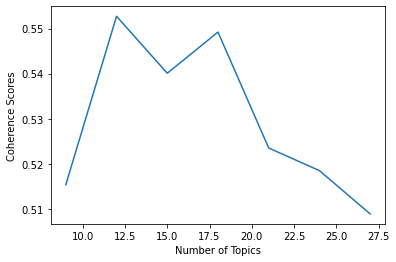

In [32]:
plt.plot(topic_numbers, coherence_scores, "-"),
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Scores")

plt.show()

In [37]:
# LDA model take highest coherence score 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=12,
                                            passes=10)

In [38]:
topics = lda_model.print_topics(num_words=7) 
topics = sorted(topics, key=lambda x: x[0])
 
for topic in topics:
    print(topic)

(0, '0.012*"parti" + 0.012*"erdoğan" + 0.011*"i̇stanbul" + 0.010*"belediye" + 0.009*"chp" + 0.008*"ak" + 0.008*"başkanı"')
(1, '0.006*"olarak" + 0.006*"bin" + 0.005*"tarafından" + 0.005*"olan" + 0.005*"göre" + 0.005*"ilgili" + 0.004*"başvuru"')
(2, '0.033*"yakala" + 0.029*"co" + 0.017*"hürriyet" + 0.012*"gün" + 0.008*"mayıs" + 0.008*"gazetesi" + 0.008*"lüks"')
(3, '0.008*"olan" + 0.007*"olarak" + 0.004*"ilk" + 0.004*"kadın" + 0.003*"dr" + 0.003*"olduğu" + 0.003*"yer"')
(4, '0.009*"fenerbahçe" + 0.008*"son" + 0.007*"ilk" + 0.007*"beşiktaş" + 0.006*"galatasaray" + 0.006*"yüzde" + 0.005*"lig"')
(5, '0.019*"yüzde" + 0.012*"milyon" + 0.011*"bin" + 0.010*"türkiye" + 0.009*"milyar" + 0.008*"olarak" + 0.008*"göre"')
(6, '0.015*"i̇ngiltere" + 0.013*"venezuela" + 0.012*"i̇srail" + 0.009*"ab" + 0.007*"başkanı" + 0.007*"brexit" + 0.006*"antarktika"')
(7, '0.014*"türkiye" + 0.012*"abd" + 0.006*"başkanı" + 0.005*"türk" + 0.005*"olarak" + 0.004*"olduğunu" + 0.004*"suriye"')
(8, '0.006*"polis" + 0.005

In [40]:
pyLDAvis.enable_notebook()
gorsel = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(gorsel)

C:\Users\Polat\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
